In [1]:
import keras
from matplotlib import pyplot as plt
import numpy as np


Using TensorFlow backend.


In [2]:
# Loading Data Set

In [3]:
from keras.datasets import cifar10

In [4]:
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
Y_train.shape

(50000, 1)

In [35]:
# 0: airplane
# 1: automobile
# 2: bird
# 3: cat
# 4: deer
# 5: dog
# 6: frog
# 7: horse
# 8: ship
# 9: truck

names = [
    "aquatic mammals",
    "fish",
    "flowers",
    "food containers",
    "fruit and vegetables",
    "household electrical devices",
    "household furniture",
    "insects",
    "large carnivores",
    "large man-made outdoor things",
    "large natural outdoor scenes",
    "large omnivores and herbivores",
    "medium-sized mammals",
    "non-insect invertebrates",
    "people",
    "reptiles",   
    "small mammals",
    "trees",
    "vehicles 1",
    "vehicles 2" 
]

In [8]:
# Normalising Data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

# Coverting Labels into Categorical Type
Y_train = keras.utils.to_categorical(Y_train,10)
Y_test = keras.utils.to_categorical(Y_test,10)

1.0


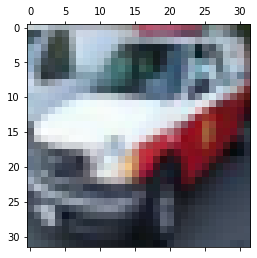

In [9]:
print(Y_train[60][1])
plt.matshow(X_train[60])

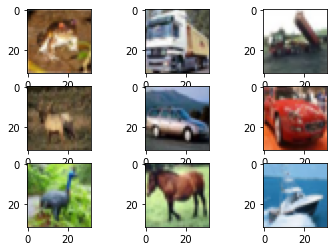

In [10]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i])

In [11]:
# Importing Keras Layers & Dense Models

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D,Activation

In [13]:
X_train.shape[1:]

(32, 32, 3)

In [14]:
model = Sequential()
#input shape is 32, 32, 3
model.add(Conv2D(64,(3,3),input_shape = X_train.shape[1:],activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
#implementing MaxPooling2D
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.45))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(96,activation='relu'))
#using Softmax for final layer
model.add(Dense(10,activation='softmax'))

In [15]:
#Summary of the Model

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)         

In [17]:
#Compiling the model, using adam optimizer for the same.

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
mmfit = model.fit(X_train,Y_train,batch_size=128,epochs = 10,validation_data=(X_test,Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 23s 462us/step - loss: 1.7658 - accuracy: 0.3318 - val_loss: 1.4768 - val_accuracy: 0.4561
Epoch 2/10
50000/50000 [==============================] - 16s 329us/step - loss: 1.3481 - accuracy: 0.5071 - val_loss: 1.2328 - val_accuracy: 0.5565
Epoch 3/10
50000/50000 [==============================] - 16s 327us/step - loss: 1.1676 - accuracy: 0.5816 - val_loss: 1.0710 - val_accuracy: 0.6171
Epoch 4/10
50000/50000 [==============================] - 17s 339us/step - loss: 1.0328 - accuracy: 0.6339 - val_loss: 0.9533 - val_accuracy: 0.6622
Epoch 5/10
50000/50000 [==============================] - 17s 332us/step - loss: 0.9317 - accuracy: 0.6724 - val_loss: 0.8630 - val_accuracy: 0.7006
Epoch 6/10
50000/50000 [==============================] - 17s 332us/step - loss: 0.8450 - accuracy: 0.7056 - val_loss: 0.7931 - val_accuracy: 0.7254
Epoch 7/10
50000/50000 [==============================] 

In [20]:
# mmfit2 = model.fit(X_train,Y_train,batch_size=100,epochs = 10)

In [21]:
#Evaluating the test case

In [22]:
model.evaluate(X_test,Y_test)

10000/10000 [==============================] - 2s 200us/step


[0.7237224860191345, 0.7531999945640564]

In [23]:
#Saving the Model

In [24]:
model.save("Model.h5")

In [25]:
#Plotting the Accuracy with respect to the test data

In [26]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [27]:
#Predicting Values

In [28]:
yp = model.predict(X_test)

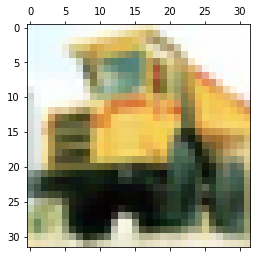

In [37]:
plt.matshow(X_test[400])

In [46]:
print(yp[400])

[6.3307380e-04 1.6829750e-03 1.8380284e-03 1.3810662e-03 1.7152295e-03
 5.6256918e-04 2.6491497e-04 5.5938442e-03 6.3685125e-05 9.8626453e-01]


In [47]:
import numpy as np

In [50]:
x = np.argmax(yp[400])

In [51]:
print("Predicted Picture is of a ", names[x])

Predicted Picture is of a  large man-made outdoor things
